# Choice of $\rho$

In this notebook we derive $\rho$, the parameter of the sigmoid used in the bounded confidence model.

It is the measure of stochasticity in the simulation of the model, as well as the measure of uncertainty in the prediction of $\epsilon$.

The bounded confidence model works in the following way:
- pick u, v
- create edge uv with probability $\sigma(\rho (\epsilon - |x_u - x_v|))$, where $\sigma()$ is the sigmoid function

Hence, if $\rho$ = 0, the two nodes will always connect with probability 0.5, if $\rho = \infty$ the will connect with probability 1 if $|x_u - x_v| < \epsilon$, otherwise with probability 0.

In the estimation step, the likelihood function of the observed edges (u,v,s,t), where s is the sign of interaction, given X is 

$\sum\limits_{u,v} s * log(\kappa (X^t)) + (1 - s) * log(1 - \kappa (X^t))$,

where $\kappa (X^t) = \sigma(\rho (\epsilon - |x^t_u - x^t_v|))$.

However, high values of $\rho (\epsilon - |x^t_u - x^t_v|)$ brings to computational issues, given by the fact that $\sigma(\rho (\epsilon - |x^t_u - x^t_v|)) \approx 1$.

In this notebook we'll find the $[\rho_0, \rho_1]$ such that:
- if $\rho < \rho_1$: $\sigma(\rho (\epsilon - |x^t_u - x^t_v|)) < 1$
- if $\rho > \rho_0$: the level of stochasticity is acceptable, meaning that two nodes with the same opinion connect with an high probability, and two nodes with opposite opinions connect with low probability

In [5]:
import sys
sys.path += ['../src/']
import simulator_BC as sim_bc
import estimation_epsilon_BC as est_bc
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import logit
from scipy.special import expit as sigmoid

In [12]:
epsilon, delta_x = 0.3, 0.2
sigmoid(70 * (epsilon - delta_x))

0.9990889488055994

In [145]:
epsilon = 0.3

In [146]:
delta_x = np.arange(0,1,0.01)

In [147]:
rhos = (10,100,1000)

In [148]:
kappas = [sigmoid(rho * (epsilon - delta_x)) for rho in rhos]

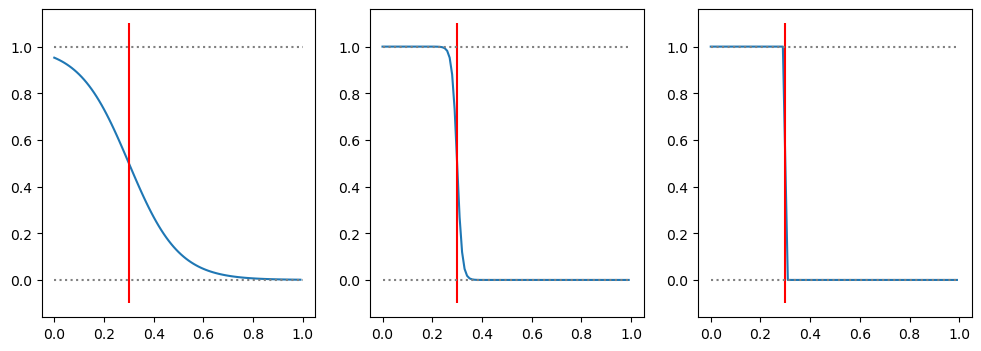

In [154]:
fig, axes = plt.subplots(figsize = (12,4), ncols = 3, nrows = 1)

for n in range(3):
    ax, kappa = axes[n], kappas[n]
    ax.plot(delta_x, kappa)
    ax.vlines(x = epsilon, ymax = 1.1, ymin = -0.1, colors = "red")
    ax.hlines(y = [0,1], xmax = 1, xmin = 0, colors = "grey", linestyles = "dotted")

In [86]:
for n in range(3):
    print(f"rho = {rhos[n]}")
    print(f"maximum probability of interaction: {kappas[n][0]}")
    print(f"minimum probability of interaction: {kappas[n][-1]}")


rho = 10
maximum probability of interaction: 0.9525741268224334
minimum probability of interaction: 0.0010067708200856378
rho = 100
maximum probability of interaction: 0.9999999999999065
minimum probability of interaction: 1.0806392777072785e-30
rho = 1000
maximum probability of interaction: 1.0
minimum probability of interaction: 2.1717382813898268e-300


### When do computational issues arise?

In [87]:
[(i, 10**(-i)) for i in range(30)]

[(0, 1),
 (1, 0.1),
 (2, 0.01),
 (3, 0.001),
 (4, 0.0001),
 (5, 1e-05),
 (6, 1e-06),
 (7, 1e-07),
 (8, 1e-08),
 (9, 1e-09),
 (10, 1e-10),
 (11, 1e-11),
 (12, 1e-12),
 (13, 1e-13),
 (14, 1e-14),
 (15, 1e-15),
 (16, 1e-16),
 (17, 1e-17),
 (18, 1e-18),
 (19, 1e-19),
 (20, 1e-20),
 (21, 1e-21),
 (22, 1e-22),
 (23, 1e-23),
 (24, 1e-24),
 (25, 1e-25),
 (26, 1e-26),
 (27, 1e-27),
 (28, 1e-28),
 (29, 1e-29)]

In [45]:
[(i, 1 - 10**(-i)) for i in range(30)]

[(0, 0),
 (1, 0.9),
 (2, 0.99),
 (3, 0.999),
 (4, 0.9999),
 (5, 0.99999),
 (6, 0.999999),
 (7, 0.9999999),
 (8, 0.99999999),
 (9, 0.999999999),
 (10, 0.9999999999),
 (11, 0.99999999999),
 (12, 0.999999999999),
 (13, 0.9999999999999),
 (14, 0.99999999999999),
 (15, 0.999999999999999),
 (16, 0.9999999999999999),
 (17, 1.0),
 (18, 1.0),
 (19, 1.0),
 (20, 1.0),
 (21, 1.0),
 (22, 1.0),
 (23, 1.0),
 (24, 1.0),
 (25, 1.0),
 (26, 1.0),
 (27, 1.0),
 (28, 1.0),
 (29, 1.0)]

In [160]:
list(enumerate(np.isclose([1 - 10**(-i) for i in range(30)], np.repeat(1, 30), atol = 10e-30, rtol = 0)))

[(0, False),
 (1, False),
 (2, False),
 (3, False),
 (4, False),
 (5, False),
 (6, False),
 (7, False),
 (8, False),
 (9, False),
 (10, False),
 (11, False),
 (12, False),
 (13, False),
 (14, False),
 (15, False),
 (16, False),
 (17, True),
 (18, True),
 (19, True),
 (20, True),
 (21, True),
 (22, True),
 (23, True),
 (24, True),
 (25, True),
 (26, True),
 (27, True),
 (28, True),
 (29, True)]

In [83]:
1 - 10**(-16), 1 - 10**(-17)

(0.9999999999999999, 1.0)

## Choice of $\rho_1$

- The problems arise when the output of the sigmoid is too close to 1

$\sigma (\rho * |\epsilon - \Delta x|) > 1 - 10^{-16}$.

- So, we need to input to the sigmoid values that are not too large. From the formula of sigmoid:

$\frac{1}{1 + exp(-\rho * z)} > 1 - 10^{-16}$,

- Inverting:

$ logit(1 - 10^{-16}) < -\rho * z$

- That is equal to:

$- logit(10^{-16}) >  \rho * z = \rho * (\epsilon - \Delta x)$ 

- Since $\Delta x$ can be equal to 0, 

$\rho < -\frac{logit(10^{-16})}{\epsilon}$


### $\rho_1 = -\frac{logit(10^{-16})}{\epsilon}$

In [95]:
upper_bound_input = - logit(10**(-16))
upper_bound_input

36.84136148790473

In [109]:
def find_upper_bound_rho(epsilon, upper_bound_input = - logit(10**(-16))):
    rho_1 = upper_bound_input / epsilon
    return rho_1

In [142]:
find_upper_bound_rho(0.5)

73.68272297580945

## Choice of $\rho_0$

- $\rho$ must be chosen in such a way, that the probability of interaction of two nodes with the same opinion is greater than $p_1$.

That is,

$\sigma (\rho (\epsilon - 0)) > p_1$

$\sigma (\rho (\epsilon)) > p_1$

$\rho * \epsilon > logit(p_1) $

$\rho > \frac{logit(p_1)}{\epsilon}$

- $\rho$ must be chosen in such a way, that the probability of interaction of two nodes with the opposing opinions is lower to $p_2$.

That is,

$\sigma (\rho (\epsilon - 1)) < p_2$

$1 - \sigma (\rho (1 - \epsilon)) < p_2$

$\sigma (\rho (1 - \epsilon)) > 1 - p_2$


$\rho > \frac{logit(1 - p_2)}{1 - \epsilon}$
 
- Hence,

$\rho_0 = min (\frac{logit(p_1)}{\epsilon}, \frac{logit(1 - p_2)}{1 - \epsilon})$

In [140]:
#p1 = probability of interaction of two nodes with same opinions
#p2 = probability of non interaction of two nodes with opposing opinions
#epsilon should be close to the extremes, because these probabilities are closer to 0.5 for for epsilon near 0 and 1
def find_lower_bound_rho(p1, p2, epsilon):
    rho_0 = max(logit(p1) / epsilon, logit(1 - p2) / (1 - epsilon))
    return rho_0

In [139]:
find_lower_bound_rho(0.95, 0.05, 0.05)

58.888779583328784

### Torch
Let's retry the same estimation with `torch.sigmoid`, instead of `sigmoid`, since the precision is different.

In [1]:
import torch

In [3]:
[(i, torch.Tensor([1 - 10**(-i)]).item()) for i in range(30)]

[(0, 0.0),
 (1, 0.8999999761581421),
 (2, 0.9900000095367432),
 (3, 0.9990000128746033),
 (4, 0.9998999834060669),
 (5, 0.9999899864196777),
 (6, 0.9999989867210388),
 (7, 0.9999998807907104),
 (8, 1.0),
 (9, 1.0),
 (10, 1.0),
 (11, 1.0),
 (12, 1.0),
 (13, 1.0),
 (14, 1.0),
 (15, 1.0),
 (16, 1.0),
 (17, 1.0),
 (18, 1.0),
 (19, 1.0),
 (20, 1.0),
 (21, 1.0),
 (22, 1.0),
 (23, 1.0),
 (24, 1.0),
 (25, 1.0),
 (26, 1.0),
 (27, 1.0),
 (28, 1.0),
 (29, 1.0)]

In [6]:
list(enumerate(np.isclose([torch.Tensor([1 - 10**(-i)]).item() for i in range(30)], np.repeat(1, 30), atol = 10e-30, rtol = 0)))

[(0, False),
 (1, False),
 (2, False),
 (3, False),
 (4, False),
 (5, False),
 (6, False),
 (7, False),
 (8, True),
 (9, True),
 (10, True),
 (11, True),
 (12, True),
 (13, True),
 (14, True),
 (15, True),
 (16, True),
 (17, True),
 (18, True),
 (19, True),
 (20, True),
 (21, True),
 (22, True),
 (23, True),
 (24, True),
 (25, True),
 (26, True),
 (27, True),
 (28, True),
 (29, True)]

In [7]:
upper_bound_input = - logit(10**(-7))
upper_bound_input

16.118095550958316

In [8]:
def find_upper_bound_rho(epsilon, upper_bound_input = - logit(10**(-7))):
    rho_1 = upper_bound_input / epsilon
    return rho_1

In [9]:
find_upper_bound_rho(0.5)

32.23619110191663